<a href="https://colab.research.google.com/github/munieshwarevakattu/CMPE257-FALL23-MUNIESHWAR-EVAKATTU/blob/Homework-1/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


<ipython-input-4-a94e4f80017e>:28: RuntimeWarning: overflow encountered in multiply
  w+=si*(float(y[i])-(np.dot(np.transpose(w),x[i]))* x[i])
<ipython-input-4-a94e4f80017e>:28: RuntimeWarning: invalid value encountered in add
  w+=si*(float(y[i])-(np.dot(np.transpose(w),x[i]))* x[i])
<ipython-input-4-a94e4f80017e>:16: RuntimeWarning: invalid value encountered in double_scalars
  c=-w[0] / w[2]


Accuracy: 100.0
Accuracy: 100.0
Accuracy: 92.64
Accuracy: 92.63


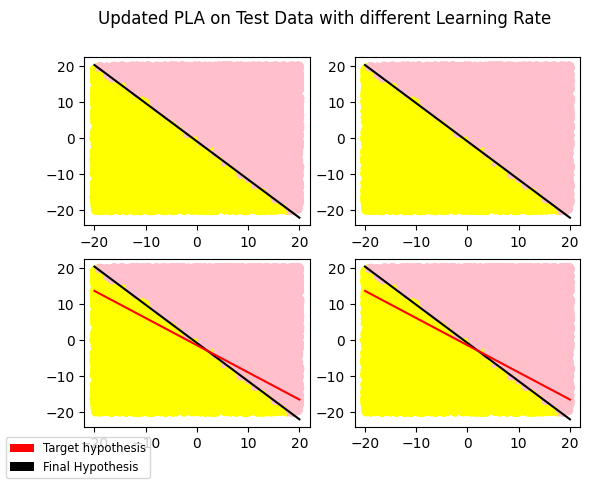

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



def mis_cla(w,x,y):
  wrong_classified=0
  for j in range(0,len(x)):
    if (y[j]*(np.dot(np.transpose(w),x[j]))<=0):
      wrong_classified+=1
  return wrong_classified

def draw_plot(w,myData,cl,axis):
  c=-w[0] / w[2]
  m = -w[1] / w[2]
  tar = np.linspace(-20, 20)
  line = m*tar+c
  axis.scatter(myData[1], myData[2], c=['pink' if label == 1 else 'yellow' for label in myData[3]])
  axis.plot(tar, line, color=cl)

def pla(w,x,y,si,myData,axis):
  iter=0
  while (mis_cla(w,x,y)!=0 or iter==1000):
    for i in range(0,len(x)):
      if (y[i]*(np.dot(np.transpose(w),x[i]))<=1):
        w+=si*(float(y[i])-(np.dot(np.transpose(w),x[i]))* x[i])
        iter+=1
        if(mis_cla(w,x,y)==0 or iter==1000):
          break
  draw_plot(w,myData,"red",axis)
  print("Accuracy:",effi(testing_data,w,10000))

def effi(data_test,w_target,N):
  data=np.array(data_test)
  x=data[:,0:3]
  y=data[:,-1]
  error=(mis_cla(w_target,x,y)/N)*100
  accuracy=100-error
  return accuracy


def gen_pla(samples, weigh0, weigh1, weigh2):
    data = []
    for _ in range(samples):
        x1 = np.random.uniform(-20, 20)
        x2 = np.random.uniform(-20, 20)
        target = 1 if weigh0 + weigh1 * x1 + weigh2 * x2 > 0 else -1
        data.append([1, x1, x2, target])
    return np.array(data)

target_weights=[15, 18,17]
t_w0, t_w1, t_w2 = 15, 18,17
initial_weights=[1,-1,2]
#data_sample = pd.read_csv('/content/Train_pla.csv')
data_sample=pd.read_csv('/content/drive/MyDrive/data/Train_pla.csv')
data_sample.insert(0, 'x0', 1)
x = data_sample[['x0', 'x1', 'x2']].values
y = data_sample['y'].values
testing_data=gen_pla(10000, t_w0, t_w1, t_w2)
myTrainData=pd.DataFrame(data_sample)
test_data = pd.DataFrame(testing_data)
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2, 2)
fig.suptitle('Updated PLA on Test Data with different Learning Rate')
one = mpatches.Patch(facecolor='red', label='Target hypothesis', linewidth = 1.0)
two = mpatches.Patch(facecolor='black', label = 'Final Hypothesis', linewidth = 1.0)
legend = fig.legend(handles=[one, two ], loc = 3, fontsize = 'small')
def learning_1():
  draw_plot(target_weights,test_data,"black",axis1)
  pla(initial_weights,x,y,100,test_data,axis1)
def learning_2():
  draw_plot(target_weights,test_data,"black",axis2)
  pla(initial_weights,x,y,1,test_data,axis2)
def learning_3():
  draw_plot(target_weights,test_data,"black",axis3)
  pla(initial_weights,x,y,0.01,test_data,axis3)
def learning_4():
  draw_plot(target_weights,test_data,"black",axis4)
  pla(initial_weights,x,y,0.0001,test_data,axis4)
learning_1()
learning_2()
learning_3()
learning_4()